In [2]:
#!pip install soundfile
#!pip install librosa
#!pip install kaggle

In [4]:
#UPLOAD your kaggle.json file

In [5]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download the data

In [7]:
# kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [9]:
# from zipfile import ZipFile

# zipped_dataset_path = './toronto-emotional-speech-set-tess.zip'
# with ZipFile(zipped_dataset_path, 'r') as zip:
#     zip.extractall(path='./data/toronto-emotional-speech-set-tess')
#     print('Successfully extracted the dataset.')

# Библиотеки

In [1]:
import librosa
import pandas as pd 
import numpy as np
import numpy.matlib
import os
import platform
import glob
import time
import seaborn as sns
import IPython.display as ipd
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
import time
import seaborn as sn
import data_loader

In [2]:
Ravdess='./data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [3]:
ravdess_directory_list=os.listdir(Ravdess)


file_emotion=[]
file_path=[]

for dir in ravdess_directory_list:
    actor=os.listdir(Ravdess + dir)
    for file in actor:
        part=file.split('.')[0]
        part=part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df=pd.DataFrame(file_emotion, columns=['Emotions'])

path_df=pd.DataFrame(file_path, columns=['Path'])
Ravdess_df=pd.concat([emotion_df,path_df],axis=1)

Ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fearful', 7:'Disgust', 8:'Surprised'}, inplace=True)
Ravdess_df.tail()

,Emotions,Path
1435,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1436,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1437,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1438,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...
1439,Surprised,./data/ravdess-emotional-speech-audio/audio_sp...


In [7]:
from plotly import express as px
import plotly 

fig=px.histogram(Ravdess_df,x='Emotions',title='Total number of emotions')
fig.update_layout(xaxis_title='Emotions',yaxis_title='Count',showlegend=False)
#fig.update_traces(marker_color='steelblue')
fig.show()

In [8]:
# plotly.offline.plot(fig, filename='Emotions_count_histogram.html')

In [4]:
# emotion='Neutral'
# path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
emotion='Angry'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[0]

y, sr= librosa.load(path)
print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
duration=librosa.get_duration(y=y,sr=sr)
print(f'The file duration is {duration} seconds')

First 20 values of y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y: (85346,)
Sample rate: 22050
The file duration is 3.8705668934240363 seconds


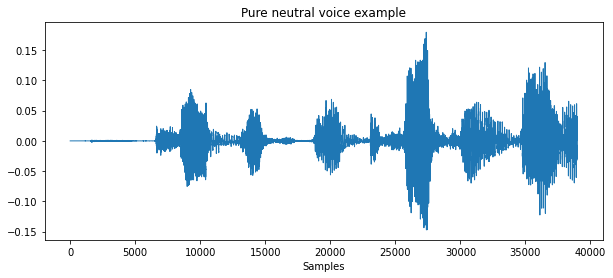

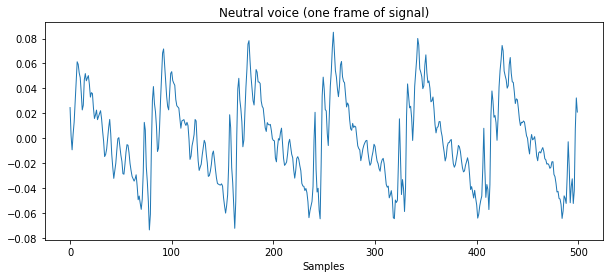

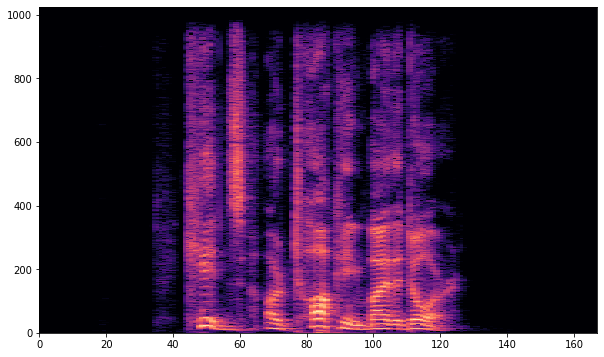

In [5]:
pd.Series(y[16000:55000]).plot(figsize=(10,4),lw=1,title='Pure neutral voice example',xlabel='Samples')
plt.show()
pd.Series(y[25000:25500]).plot(figsize=(10,4), lw=1, title='Neutral voice (one frame of signal)',xlabel='Samples')
plt.show()
#Spectogram and a mathematical parts.
Y=librosa.stft(y)           #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(Y), ref=np.max) #Changing amplitude to decibel.
a,ax=plt.subplots(figsize=(10,6))

# img=librosa.display.specshow(S_db,
#                             x_axis='time',
#                             y_axis='log',#wave form after transformation.
#                             #y_axis='linear',
#                             #y_axis='mel',
#                             ax=ax)
# ax.set_title('Spectogram of Neutral voice (freq in log scale)', fontsize=14)
# a.colorbar(img, ax=ax,format=f'%0.2f')
plt.pcolor(S_db,cmap='magma',shading='flat')
plt.show()
ipd.Audio(path)
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

## Images for article

In [6]:
emotion='Angry'
path=np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]

y, sr= librosa.load(path)
# print(f'First 20 values of y:{y[:20]}') #Means almost first 20 ms
print(f'Shape of y: {y.shape}')
print(f'Sample rate: {sr}')
# duration=librosa.get_duration(y=y,sr=sr)
# print(f'The file duration is {duration} seconds')

Shape of y: (86817,)
Sample rate: 22050


C:\Users\Admin\AppData\Local\Temp\ipykernel_11664\2963699190.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


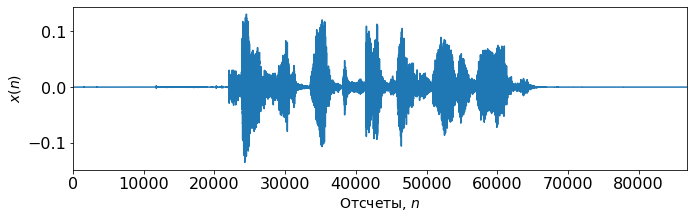

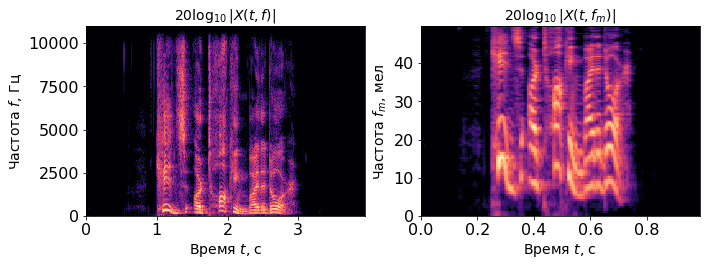

In [18]:
fig,ax=plt.subplots(figsize=(11,3.0))
plt.rcParams.update({'font.size': 16})
# fig,ax=plt.subplots(dpi=100)
plt.plot(y)
# plt.xlabel('Samples, $n$', fontsize=14)
plt.xlabel('Отсчеты, $n$', fontsize=14)
plt.ylabel('$x(n)$', fontsize=14)
plt.xlim([0, len(y)])
# plt.title('$Представление речевого сигнала, выражающего гнев$', fontsize=14)

image_name = f'Doc/figures/anger_speech_signal.jpg'
fig.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.2) 

#Spectogram and a mathematical parts
n_fft = 512
h_size = n_fft//4
d=librosa.stft(y,n_fft=n_fft) #Fourier transform here
S_db=librosa.amplitude_to_db(np.abs(d), ref=np.max) #Changing ampitude to decibel.
time_grid = np.linspace(0, S_db.shape[1]*h_size/sr, S_db.shape[1]+1)
freq_grid = np.linspace(0, sr/2, S_db.shape[0]+1)

S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256, fmax =sr/2)
S_mel_dB = librosa.power_to_db(S_mel, ref=np.max)
freq_mel_grid = librosa.hz_to_mel(np.linspace(0, sr/2, S_mel_dB.shape[0]+1))


fig,ax=plt.subplots(figsize=(11,3.5))
T,F = np.meshgrid(time_grid,freq_grid)
# T = np.matlib.repmat(time_grid,S_db.shape[0],1)
# F = np.matlib.repmat(freq_grid.reshape(S_db.shape[0],1),1,S_db.shape[1])
# plt.pcolor(T,F,S_db,cmap='magma',shading='flat')
# plt.pcolor(time_grid,freq_grid,S_db,cmap='magma',shading='flat')
plt.subplot(1,2,1)
plt.pcolormesh(T,F,S_db,cmap='magma',shading='flat')


# plt.xlabel('Time $t$, s', fontsize=14)
# plt.ylabel('Frequency $f$, Hz ', fontsize=14)

plt.xlabel('Время $t$, c', fontsize=14)
plt.ylabel('Частота $f$, Гц ', fontsize=14)

plt.title('$20 \log_{10}{|X(t,f)|}$', fontsize=14)

plt.subplot(1,2,2)
time_grid = np.linspace(0, S_mel_dB.shape[1]*h_size/sr, S_mel_dB.shape[1]+1)
T,F = np.meshgrid(time_grid,freq_mel_grid)
plt.pcolormesh(T,F,S_mel_dB,cmap='magma',shading='flat')

plt.xlabel('Время $t$, c', fontsize=14)
plt.ylabel('Частота $f_m$, мел ', fontsize=14)

plt.title('$20 \log_{10}{|X(t,f_m)|}$', fontsize=14)

# plt.show()
# ipd.Audio(path)
image_name = f'Doc/figures/anger_spectrogram.jpg'
fig.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.2) 
#Each difference in the graph at the end carries an attribute. Think of it like pixels in pictures

## Plot MFCC

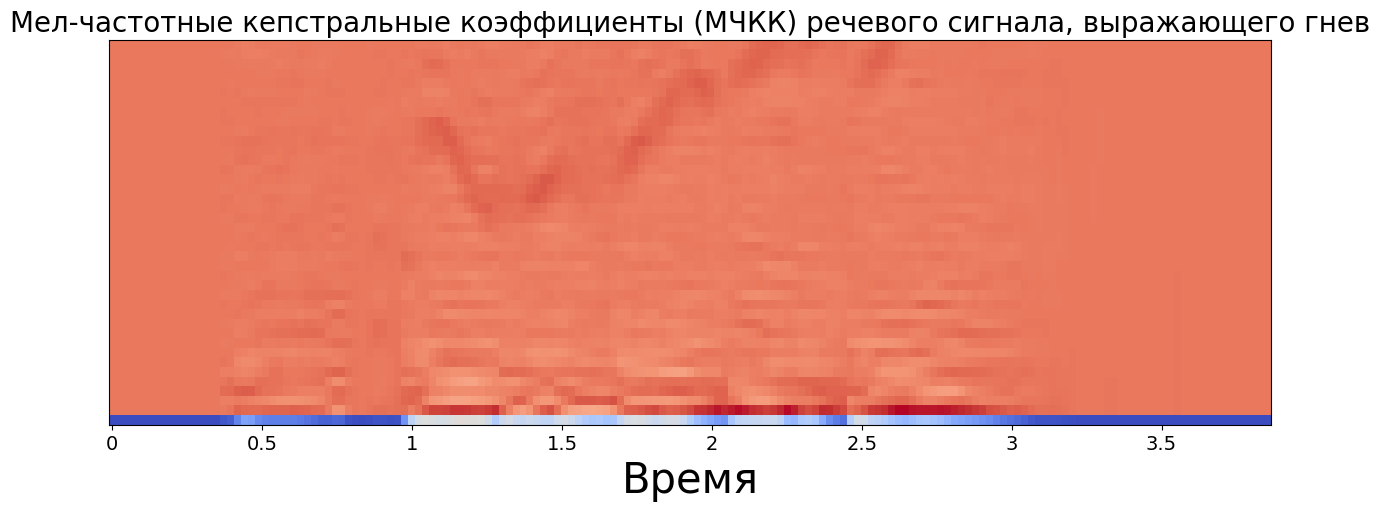

In [13]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
# plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCC) of the speech signal expressing anger', fontsize=20)
plt.xlabel('Time', fontsize=30)
image_name = f'Doc/figures/anger_mfcc.jpg'
plt.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.2) 

## Plot MFCC-2

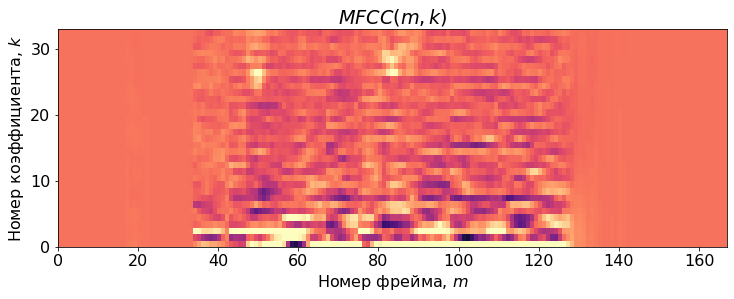

In [8]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=34)
plt.rcParams.update({'font.size': 16})
mfccs = mfccs[1:,:] # exclude coeff 0

fig,ax=plt.subplots(figsize=(12,4))
# plt.subplot(3,1,1)
plt.pcolor(mfccs, cmap='magma',shading='flat')
plt.xlabel('Номер фрейма, $m$')
plt.ylabel('Номер коэффициента, $k$')
plt.title('$MFCC(m,k)$')    # ,fontsize=14
plt.clim((-95,40))

image_name = f'Doc/figures/anger_melspectrogram.jpg'
fig.savefig(image_name, format='jpg', dpi=220, bbox_inches='tight', pad_inches = 0.2)

# VAD experiments

C:\Users\Admin\AppData\Local\Temp\ipykernel_10876\669986617.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


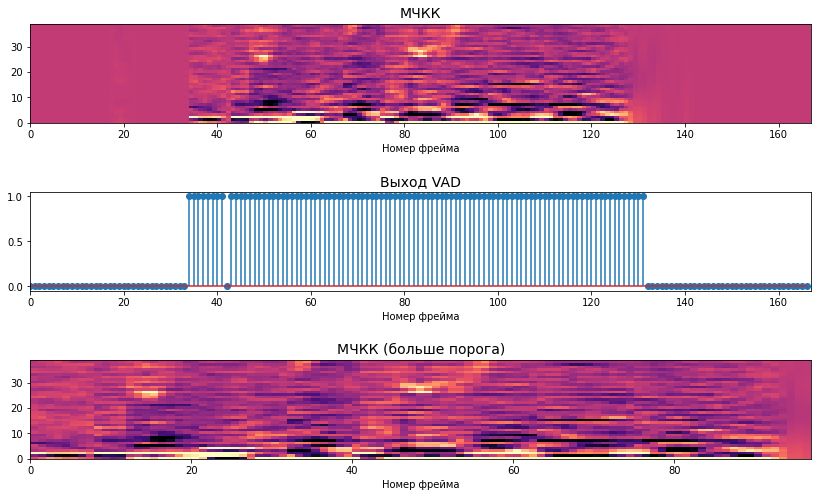

In [6]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
# VAD
mfccs = mfccs[1:,:] # exclude coeff 0
mel_frame_power = np.sum(mfccs**2,axis=0)/mfccs.shape[0]
mel_uttr_power = np.sum(mel_frame_power)/mfccs.shape[1]
r1,r2 = 5, 0.5
vad_threshold = r1 + r2*np.log10(mel_uttr_power)
vad_out = mel_frame_power>vad_threshold

fig,ax=plt.subplots(figsize=(14,8))
plt.subplot(3,1,1)
plt.pcolor(mfccs, cmap='magma',shading='flat')
plt.xlabel('Номер фрейма')
plt.title('МЧКК',fontsize=14)
plt.clim((-45,40))
plt.subplot(3,1,2)
plt.xlim([0, mfccs.shape[1]])
plt.stem(vad_out)
plt.xlabel('Номер фрейма')
plt.title('Выход VAD',fontsize=14)

plt.subplot(3,1,3)
plt.pcolor(mfccs[:,vad_out], cmap='magma',shading='flat')
plt.xlabel('Номер фрейма')
plt.title('МЧКК (больше порога)',fontsize=14)
plt.clim((-45,40))

plt.subplots_adjust(hspace=0.7)



# $\Delta$ MFCC Extraction

(167, 39)
(167, 39)
(39,)
(39,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10876\4039831091.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


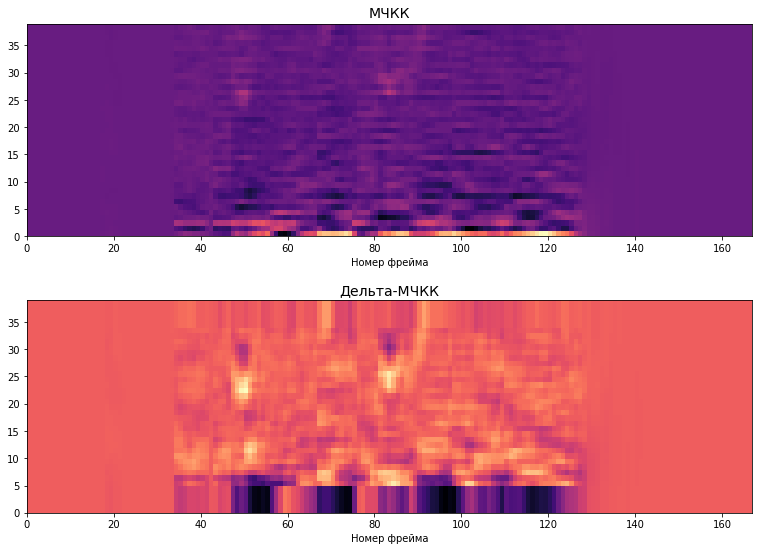

In [18]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T
mfccs = mfccs[:,1:] # exclude coeff 0
mfcc_delta = librosa.feature.delta(mfccs)
print(mfccs.shape)
print(mfcc_delta.shape)

mean_delta_mfcc = np.mean(mfcc_delta, axis=0)
sd_delta_mfcc = np.std(mfcc_delta, axis=0)
print(mean_delta_mfcc.shape)
print(sd_delta_mfcc.shape)

fig,ax=plt.subplots(figsize=(13,9))
plt.subplot(2,1,1)
plt.pcolor(mfccs.T, cmap='magma',shading='flat')
plt.xlabel('Номер фрейма')
plt.title('МЧКК',fontsize=14)
# plt.clim((-45,40))
plt.subplot(2,1,2)
plt.pcolor(mfcc_delta.T, cmap='magma',shading='flat')
plt.xlabel('Номер фрейма')
plt.title('Дельта-МЧКК',fontsize=14)
# plt.clim((-45,40))
plt.subplots_adjust(hspace=0.3)

### Validation feature vector

/tmp/ipykernel_30893/1576598134.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



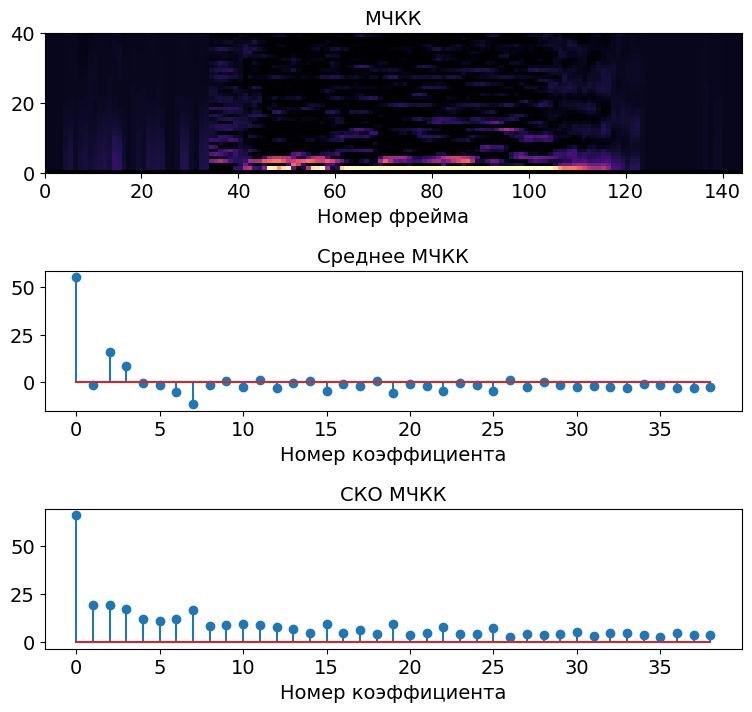

In [20]:
file_name = "data/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav"
mfcc = True
X, sample_rate = librosa.load(file_name)

mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T
mean_mfcc,sd_mfcc  = data_loader.extract_feature(file_name, mfcc)

fig,ax=plt.subplots(figsize=(9,8))
plt.subplot(3,1,1)
plt.pcolor(mfccs.T, cmap='magma',shading='flat')
plt.xlabel('Номер фрейма')
plt.title('МЧКК',fontsize=14)
plt.clim((-5,90))
plt.subplot(3,1,2)
plt.stem(mean_mfcc[1:])
plt.xlabel('Номер коэффициента')
plt.title('Среднее МЧКК',fontsize=14)
plt.subplot(3,1,3)
plt.stem(sd_mfcc[1:])
plt.xlabel('Номер коэффициента')
plt.title('СКО МЧКК',fontsize=14)
plt.subplots_adjust(hspace=0.7)